In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
!pwd

/content


In [12]:
cd /content/gdrive/My\ Drive/Project_folder

/content/gdrive/My Drive/Project_folder


In [13]:
!pwd

/content/gdrive/My Drive/Project_folder


In [14]:
!dir

Movie\ recommendation\ system


In [15]:
!mkdir Face_recognition

In [16]:
!dir

Face_recognition  Movie\ recommendation\ system


In [17]:
cd /content/gdrive/My\ Drive/Project_folder/Face_recognition

/content/gdrive/My Drive/Project_folder/Face_recognition


In [18]:
!dir

In [19]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=7814c361b389977d74fbb1436ad9e3e460564d02a4a5689fcb07ecc82f4d4f80
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [20]:
import matplotlib.pyplot as plt

In [21]:
from skimage.feature import hog

In [22]:
from skimage import data, exposure

In [23]:
import cv2

In [25]:
image=cv2.imread('george-clooney.jpg')

In [28]:
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [30]:
fd,hog_image=hog(image,orientations=8,pixels_per_cell=(16,16),cells_per_block=(1,1),visualize=True,multichannel=True)

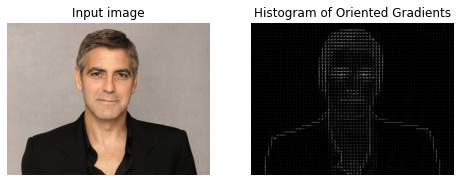

In [37]:
fig, (ax1, ax2)=plt.subplots(1,2,figsize=(8,4),sharex=True,sharey=True) 

ax1.axis('off')
ax1.imshow(image,cmap=plt.cm.gray)
ax1.set_title('Input image')

hog_image_rescaled=exposure.rescale_intensity(hog_image,in_range=(0,10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled,cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [38]:
len(fd)

24576

In [39]:
image.shape

(768, 1024, 3)

In [40]:
import face_recognition

In [41]:
import matplotlib.pyplot as plt

In [42]:
from matplotlib.patches import Rectangle

In [43]:
from matplotlib.patches import Circle

In [44]:
import numpy as np

In [45]:
import cv2

In [46]:
%matplotlib inline

In [87]:
image=cv2.imread('george_brad.jpg')

In [88]:
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

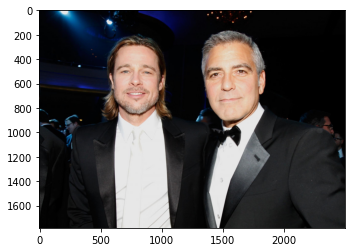

In [89]:
plt.imshow(image)

In [90]:
face_locations=face_recognition.face_locations(image)

In [91]:
number_of_faces=len(face_locations)

In [92]:
print("Found {} face(s) in input image.".format(number_of_faces))

Found 2 face(s) in input image.


A face is located at pixel location Top: 589, Left: 418, Bottom: 974, Right: 804
A face is located at pixel location Top: 1324, Left: 400, Bottom: 1786, Right: 862


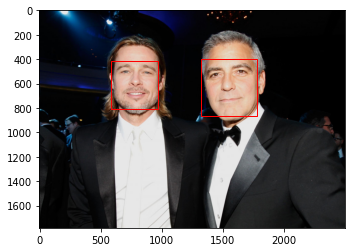

In [93]:
plt.imshow(image)
ax=plt.gca()
for face_location in face_locations:
  top,right,bottom,left=face_location
  x,y,w,h=left,top,right,bottom
  print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(x,y,w,h))

  rect=Rectangle((x,y),w-x,h-y,fill=False,color='red')
  ax.add_patch(rect)
  
plt.show()

In [94]:
#Face Recognition

In [96]:
import face_recognition

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline


In [111]:
image=cv2.imread('demo.jpg')
face_demo=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image=cv2.imread('george-clooney.jpg')
clooney=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image=cv2.imread('barack_obama.png')
obama=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image=cv2.imread('brad.jpg')
brad=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [112]:
face_demo_encoding=face_recognition.face_encodings(face_demo)[0]
clooney_encoding=face_recognition.face_encodings(clooney)[0]
obama_encoding=face_recognition.face_encodings(obama)[0]
brad_encoding=face_recognition.face_encodings(brad)[0]

known_face_encodings= [
  face_demo_encoding,
  clooney_encoding,
  obama_encoding,
  brad_encoding
]

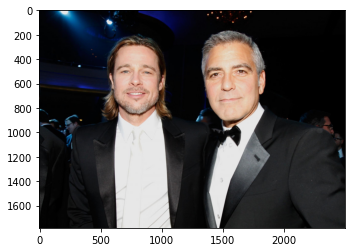

In [115]:
image=cv2.imread('george_brad.jpg')
unknown_image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)

unknown_face_encodings=face_recognition.face_encodings(unknown_image)

In [116]:
from scipy.spatial import distance

for unknown_face_encoding in unknown_face_encodings:
  results=[]
  for known_face_encoding in known_face_encodings:
    d=distance.euclidean(known_face_encoding,unknown_face_encoding)
    results.append(d)
  threshold=0.6
  results=np.array(results)<=threshold

  name="Unknown"

  if results[0]:
    name="Face demo image"
  elif results[1]:
    name="George Clooney"
  elif results[2]:
    name="Barack Obama"
  elif results[3]:
    name="Brad Pitt"

  print(f"Found {name} in the photo!")

Found Brad Pitt in the photo!
Found George Clooney in the photo!


In [117]:
#Face landmarks

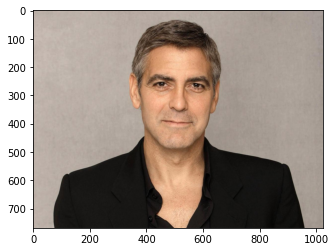

In [122]:
image=cv2.imread('george-clooney.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [123]:
face_landmarks_list=face_recognition.face_landmarks(image)

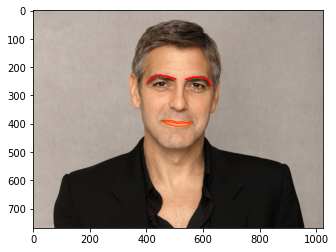

In [127]:
import matplotlib.lines as mlines
from matplotlib.patches import Polygon

plt.imshow(image)
ax=plt.gca()

for face_landmarks in face_landmarks_list:
  left_eyebrow_pts=face_landmarks['left_eyebrow']
  pre_x,pre_y=left_eyebrow_pts[0]
  for (x,y) in left_eyebrow_pts[1:]:
    l=mlines.Line2D([pre_x,x],[pre_y,y],color="red")
    ax.add_line(l)
    pre_x,pre_y=x,y

  right_eyebrow_pts=face_landmarks['right_eyebrow']
  pre_x,pre_y=right_eyebrow_pts[0]
  for (x,y) in right_eyebrow_pts[1:]:
    l=mlines.Line2D([pre_x,x],[pre_y,y],color="red")
    ax.add_line(l)
    pre_x,pre_y=x,y  

  P=Polygon(face_landmarks['top_lip'],facecolor='lightsalmon',edgeColor='orangered')
  ax.add_patch(P)
  P=Polygon(face_landmarks['bottom_lip'],facecolor='lightsalmon',edgeColor='orangered')
  ax.add_patch(P)

plt.show()